In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Loading the tensors

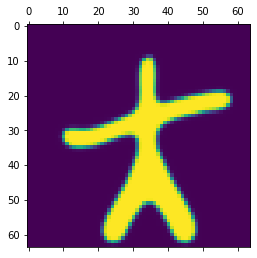

In [4]:
template_data = np.load('images/SimulatedData__Reconstruction__starman__subject_s0__tp_0.npy')
plt.matshow(template_data)
plt.show()

In [5]:
data_info = pd.read_csv('df.csv', usecols=['tau', 'alpha', 't']).rename(columns={'t':'TIME'})
data_info['ID'] = [i//10 for i in range(10000)]
data_info['xi'] = np.log(data_info['alpha'])
data_info = data_info.set_index('ID')

In [6]:
data_dict = {'data':torch.tensor(template_data).unsqueeze(0), 'timepoints':torch.ones(1), 'labels':torch.IntTensor([1])}

for sub in range(1000):
    for visit in range(10):
        img = np.load('images/SimulatedData__Reconstruction__starman__subject_s'+str(sub)+'__tp_'+str(visit)+'.npy')
        age = data_info.loc[sub].iloc[visit]['TIME']      

        data_dict['data'] = torch.cat((data_dict['data'], torch.tensor(img).float().unsqueeze(0)))
        data_dict['timepoints'] = torch.cat((data_dict['timepoints'], torch.FloatTensor([age])))
        data_dict['labels'] = torch.cat((data_dict['labels'], torch.IntTensor([sub])))
                
# Threshold to have a lot of 0 values in the input
mask_threshold = data_dict['data']<(torch.tensor(1e-2))
data_dict['data'][mask_threshold] = 0
        
# Then delete the template data
data_dict['data'], data_dict['timepoints'], data_dict['labels'] = data_dict['data'][1:], data_dict['timepoints'][1:], data_dict['labels'][1:]

data_dict

KeyboardInterrupt: 

In [ ]:
print(f"There are {data_dict['data'].shape[0]} visits with a total of {data_dict['data'].shape[1]*data_dict['data'].shape[2]} dimentions")

In [ ]:
torch.save(data_dict, 'Starmen_1000')

In [7]:
data_dict = torch.load('Starmen_1000')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

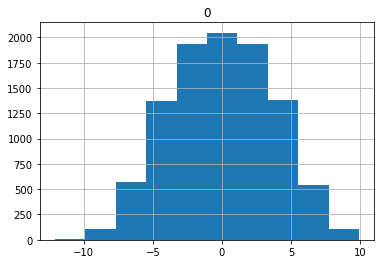

In [8]:
pd.DataFrame(data_dict['timepoints']).hist()

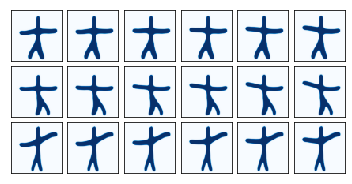

In [10]:
fig, axes = plt.subplots(3,6, figsize=(6,3))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for sub in range(3):
    for visit in range(6):
        img = np.load('images/SimulatedData__Reconstruction__starman__subject_s'+str(sub+5)+'__tp_'+str(visit)+'.npy')
        axes[sub][visit].matshow(img, cmap='Blues')
        axes[sub][visit].set_xticks([])
        axes[sub][visit].set_yticks([])

plt.savefig('starmen_dataset.png', dpi=300)